In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
# Dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,-1].values

In [3]:
# Divisão do dataset em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [4]:
# Padronização
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
# Classificador SVM
svm = SVC(kernel="linear", random_state=3)
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=3)

In [6]:
# Predição
result = svm.predict(X_test)
cm = confusion_matrix(Y_test, result)
print(f"Matriz de Confusão: {cm}")

Matriz de Confusão: [[60  5]
 [10 25]]


<ipython-input-7-8d48c71f96bc>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],


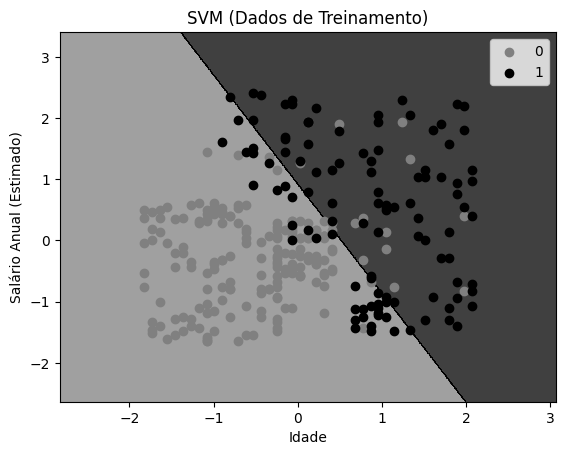

In [7]:
# Visualização (dados de treino)
_X, _Y = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('grey', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

<ipython-input-8-898bb3b4000d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],


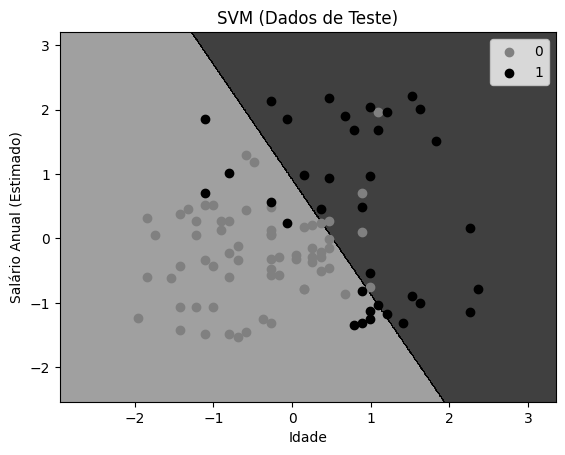

In [8]:
# Visualização (dados de teste)
_X, _Y = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('grey', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_Y)):
    plt.scatter(_X[_Y == j, 0], _X[_Y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()